# Project objective
 - To predict the rate of production of oil, gas and water from the data provide using machine learning

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load data
data = pd.read_csv('Well_Rates.csv')


In [3]:
# display first five rows
data.head()

,Qoil,Qwater,Qgas,BHP,WHP,WHT,Tsep,Psep,Choke_in
0,954.6,0.0,2.39,5410.33,3185.75,83.30,60.32,100.0,0.25
1,801.9,200.5,2.01,5388.00,3015.38,86.88,60.65,100.0,0.25
2,634.7,423.2,1.59,5391.13,2808.80,90.83,61.19,100.0,0.25
3,448.1,672.2,1.12,5405.72,2515.99,95.11,61.97,100.0,0.25
4,238.9,955.7,0.60,5433.80,2059.65,99.88,63.10,100.0,0.25


In [4]:
# check columns and rows 
data.shape

(2100, 9)

In [5]:
# check data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Qoil      2100 non-null   float64
 1   Qwater    2100 non-null   float64
 2   Qgas      2100 non-null   float64
 3   BHP       2100 non-null   float64
 4   WHP       2100 non-null   float64
 5   WHT       2100 non-null   float64
 6   Tsep      2100 non-null   float64
 7   Psep      2100 non-null   float64
 8   Choke_in  2100 non-null   float64
dtypes: float64(9)
memory usage: 147.8 KB


In [6]:
# check missing values
data.isna().sum()

Qoil        0
Qwater      0
Qgas        0
BHP         0
WHP         0
WHT         0
Tsep        0
Psep        0
Choke_in    0
dtype: int64

In [7]:
# check duplicated values
duplicate = data.duplicated()
print(duplicate.sum())

0


In [8]:
# view the descriptive statistics of the data
data.describe()

,Qoil,Qwater,Qgas,BHP,WHP,WHT,Tsep,Psep,Choke_in
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.00000,2100.000000
mean,2422.861810,1882.308714,9.493971,4716.083324,1918.292305,145.909257,97.696486,350.00000,1.023000
std,1541.001868,1862.011574,6.231652,435.269654,811.165237,29.409260,24.843953,170.82319,0.712687
min,210.400000,0.000000,0.600000,4074.680000,608.490000,74.990000,60.110000,100.00000,0.250000
25%,1104.700000,354.300000,4.150000,4315.790000,1194.920000,124.180000,72.450000,200.00000,0.420000
50%,2182.200000,1186.850000,8.220000,4615.805000,1766.865000,156.855000,101.800000,350.00000,0.800000
75%,3626.100000,2879.900000,13.935000,5135.580000,2611.970000,168.830000,118.010000,500.00000,1.500000
max,6411.300000,6639.000000,25.890000,5490.920000,3946.110000,182.790000,140.460000,600.00000,2.500000


# EDA

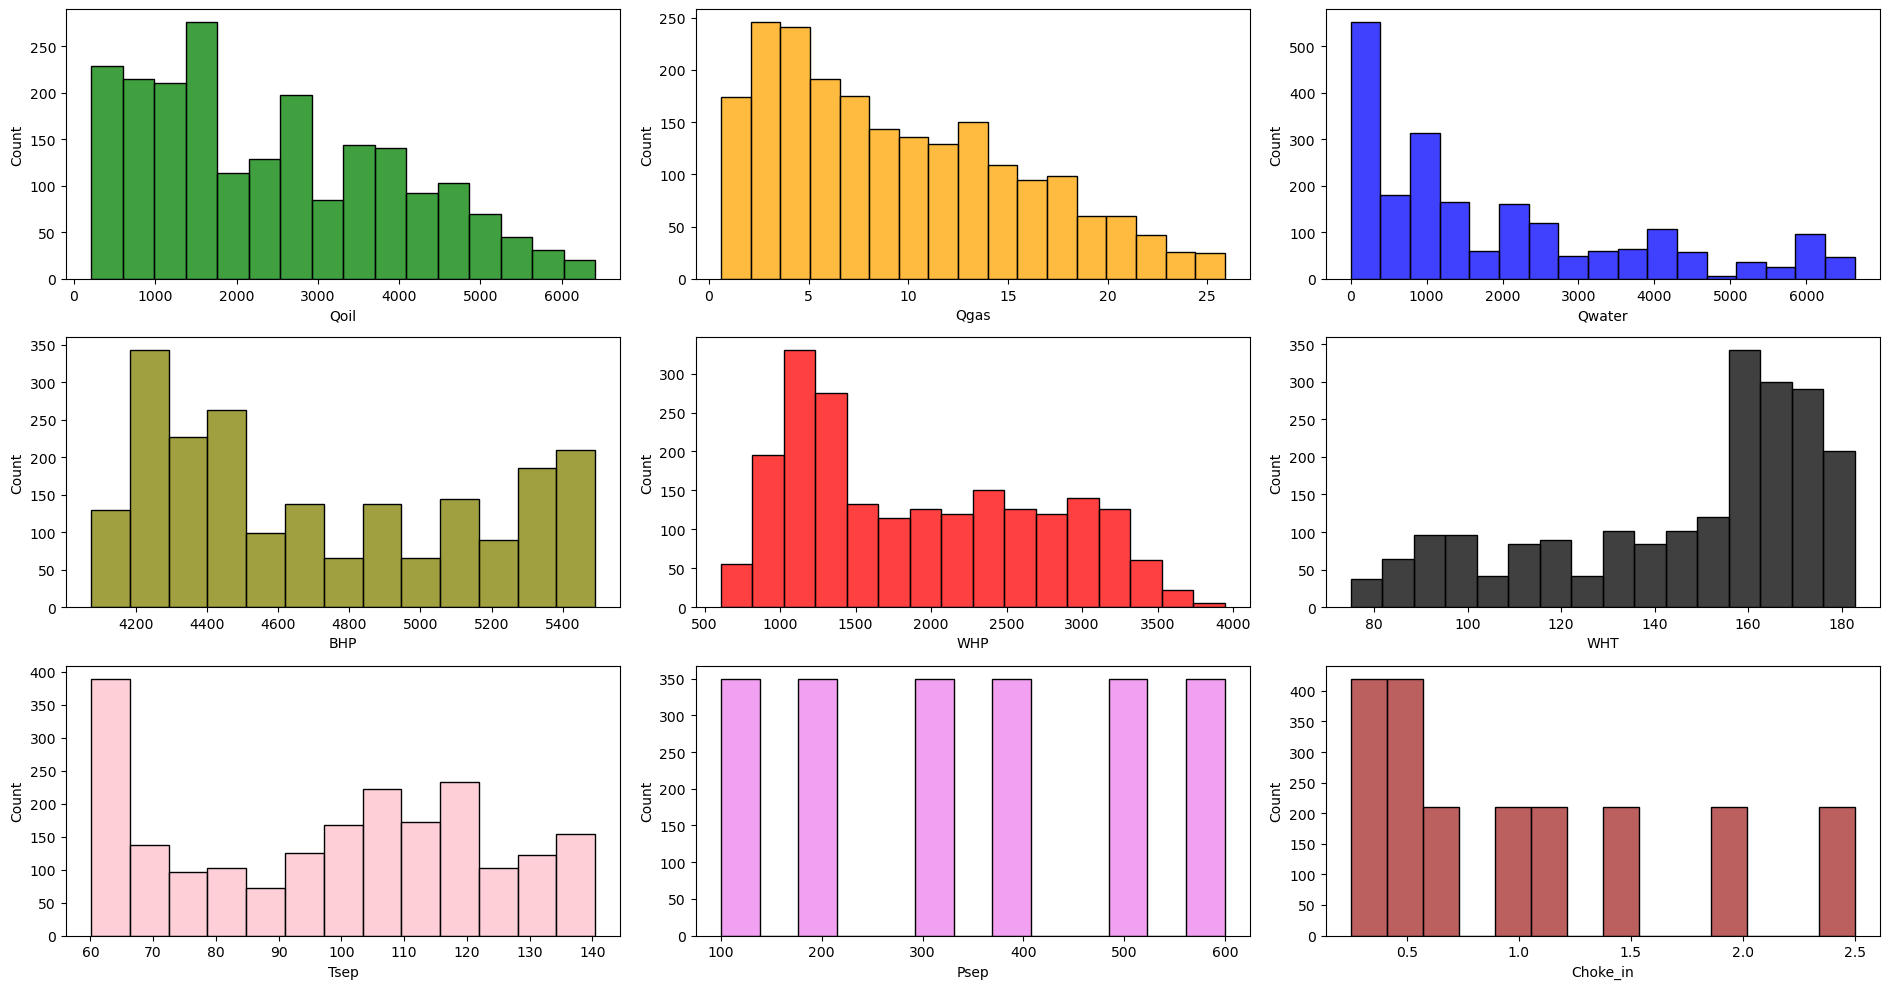

In [20]:
# check distribution of the data columns
fig, ax = plt.subplots(3,3, figsize=(19,10))

sns.histplot(x=data['Qoil'],data =data, color='green', ax=ax[0,0])
sns.histplot(x=data['Qgas'],data=data, color='orange', ax=ax[0,1])
sns.histplot(x=data['Qwater'],data =data, color='blue', ax=ax[0,2])
sns.histplot(x=data['BHP'],data=data, color='olive', ax=ax[1,0])
sns.histplot(x=data['WHP'],data =data, color='red', ax=ax[1,1])
sns.histplot(x=data['WHT'],data=data, color='black', ax=ax[1,2])
sns.histplot(x=data['Tsep'],data =data, color='pink', ax=ax[2,0])
sns.histplot(x=data['Psep'],data=data, color='violet', ax=ax[2,1])
sns.histplot(x=data['Choke_in'],data=data, color='brown',ax=ax[2,2])
plt.tight_layout()
plt.show()

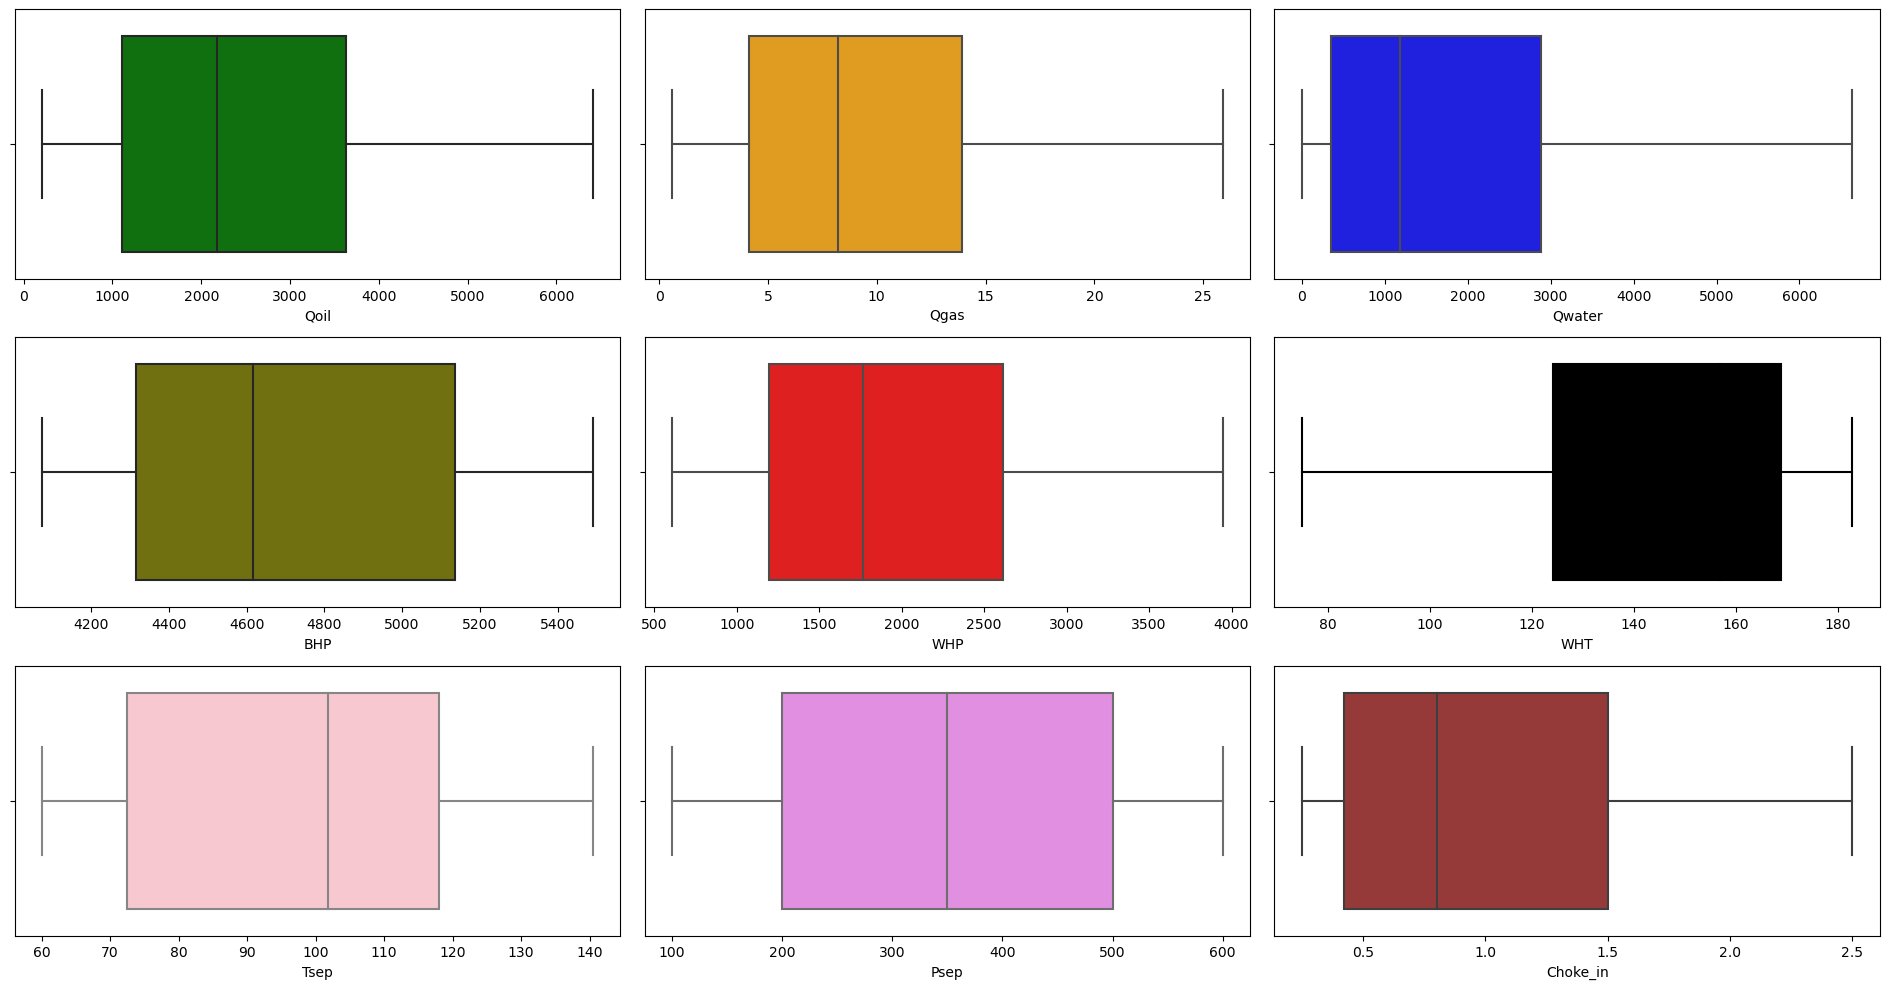

In [21]:
# check outliers using boxplot
fig, ax = plt.subplots(3,3, figsize=(19,10))

sns.boxplot(x=data['Qoil'],data =data, color='green', ax=ax[0,0])
sns.boxplot(x=data['Qgas'],data=data, color='orange', ax=ax[0,1])
sns.boxplot(x=data['Qwater'],data =data, color='blue', ax=ax[0,2])
sns.boxplot(x=data['BHP'],data=data, color='olive', ax=ax[1,0])
sns.boxplot(x=data['WHP'],data =data, color='red', ax=ax[1,1])
sns.boxplot(x=data['WHT'],data=data, color='black', ax=ax[1,2])
sns.boxplot(x=data['Tsep'],data =data, color='pink', ax=ax[2,0])
sns.boxplot(x=data['Psep'],data=data, color='violet', ax=ax[2,1])
sns.boxplot(x=data['Choke_in'],data=data, color='brown',ax=ax[2,2])
plt.tight_layout()
plt.show()

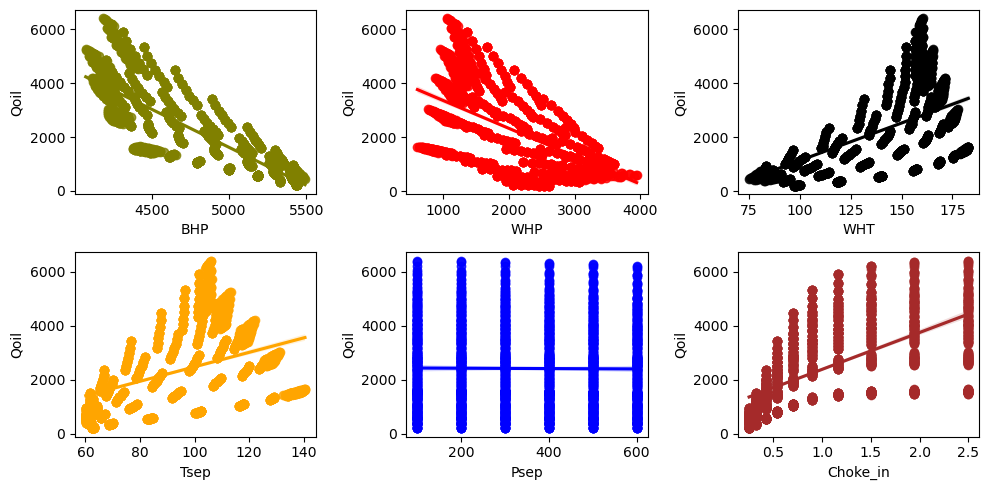

In [32]:
# scatterplot of Qoil vs other features

fig, ax = plt.subplots(2,3, figsize=(10,5))

sns.regplot(x=data['BHP'],y=data['Qoil'],data=data, color='olive', ax=ax[0,0])
sns.regplot(x=data['WHP'],y=data['Qoil'],data =data, color='red', ax=ax[0,1])
sns.regplot(x=data['WHT'],y=data['Qoil'],data=data, color='black', ax=ax[0,2])
sns.regplot(x=data['Tsep'],y=data['Qoil'],data =data, color='orange', ax=ax[1,0])
sns.regplot(x=data['Psep'],y=data['Qoil'],data=data, color='blue', ax=ax[1,1])
sns.regplot(x=data['Choke_in'],y=data['Qoil'],data=data, color='brown',ax=ax[1,2])
plt.tight_layout()
plt.show()

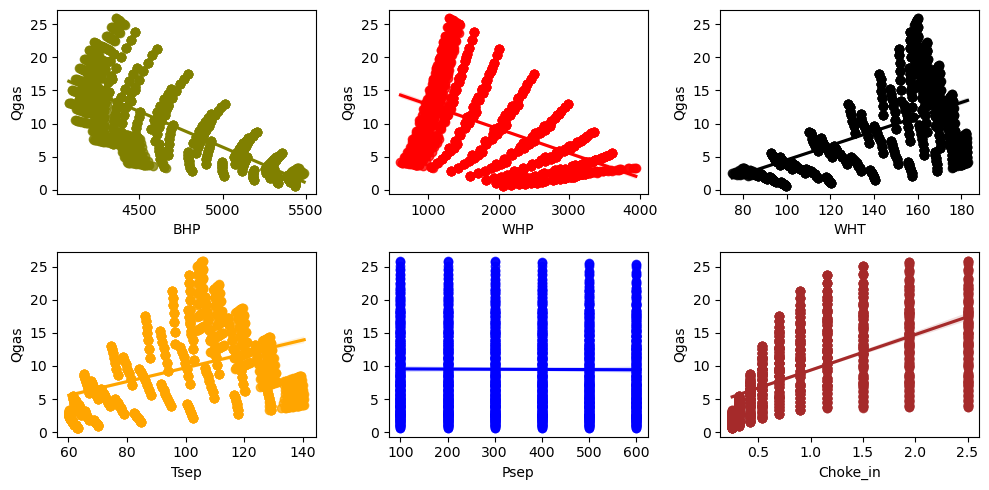

In [33]:
# scatterplot of Qgas vs other features

fig, ax = plt.subplots(2,3, figsize=(10,5))

sns.regplot(x=data['BHP'],y=data['Qgas'],data=data, color='olive', ax=ax[0,0])
sns.regplot(x=data['WHP'],y=data['Qgas'],data =data, color='red', ax=ax[0,1])
sns.regplot(x=data['WHT'],y=data['Qgas'],data=data, color='black', ax=ax[0,2])
sns.regplot(x=data['Tsep'],y=data['Qgas'],data =data, color='orange', ax=ax[1,0])
sns.regplot(x=data['Psep'],y=data['Qgas'],data=data, color='blue', ax=ax[1,1])
sns.regplot(x=data['Choke_in'],y=data['Qgas'],data=data, color='brown',ax=ax[1,2])
plt.tight_layout()
plt.show()

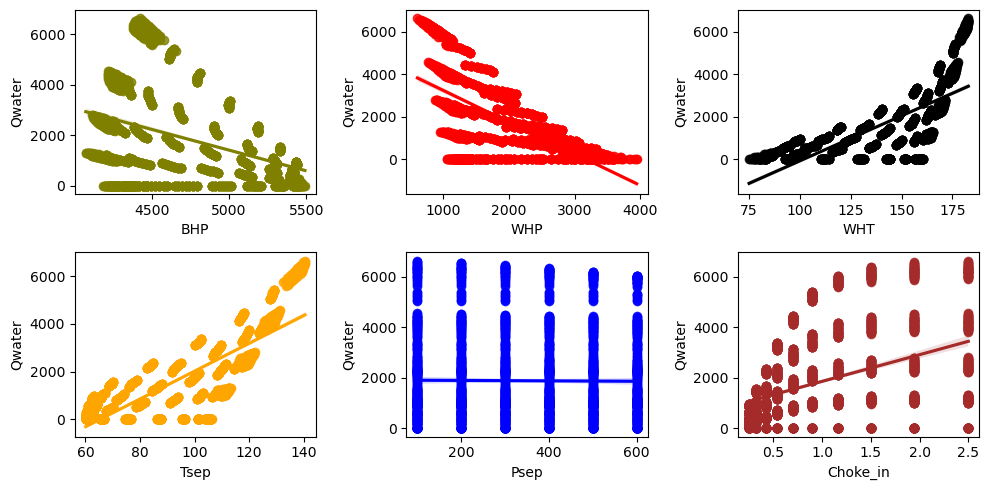

In [34]:
# scatterplot of Qwater vs other features

fig, ax = plt.subplots(2,3, figsize=(10,5))

sns.regplot(x=data['BHP'],y=data['Qwater'],data=data, color='olive', ax=ax[0,0])
sns.regplot(x=data['WHP'],y=data['Qwater'],data =data, color='red', ax=ax[0,1])
sns.regplot(x=data['WHT'],y=data['Qwater'],data=data, color='black', ax=ax[0,2])
sns.regplot(x=data['Tsep'],y=data['Qwater'],data =data, color='orange', ax=ax[1,0])
sns.regplot(x=data['Psep'],y=data['Qwater'],data=data, color='blue', ax=ax[1,1])
sns.regplot(x=data['Choke_in'],y=data['Qwater'],data=data, color='brown',ax=ax[1,2])
plt.tight_layout()
plt.show()

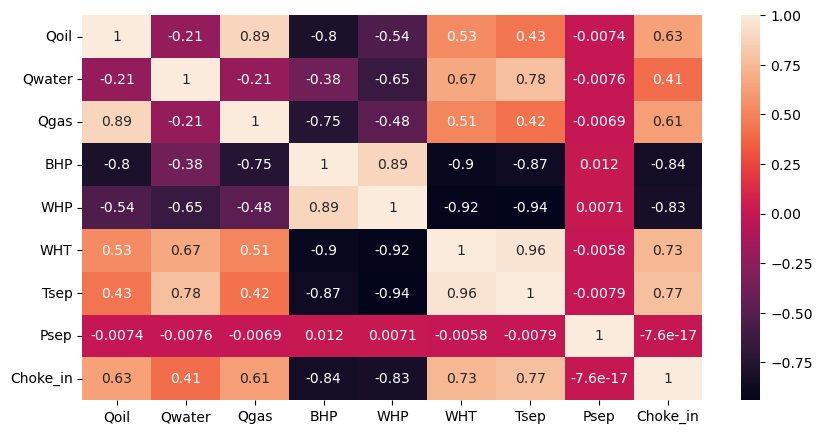

In [39]:
# Correlation of columns
plt.figure(figsize=(10,5))
corr = data.corr()
sns.heatmap(corr,annot=True,)
plt.show()

# Feature Engineering

In [40]:

# Set target and input features

X = data.drop(['Qoil','Qgas','Qwater'], axis =1)
Y = data[['Qoil','Qgas','Qwater']]

In [42]:
X.head()

,BHP,WHP,WHT,Tsep,Psep,Choke_in
0,5410.33,3185.75,83.30,60.32,100.0,0.25
1,5388.00,3015.38,86.88,60.65,100.0,0.25
2,5391.13,2808.80,90.83,61.19,100.0,0.25
3,5405.72,2515.99,95.11,61.97,100.0,0.25
4,5433.80,2059.65,99.88,63.10,100.0,0.25


In [43]:
Y.head()

,Qoil,Qgas,Qwater
0,954.6,2.39,0.0
1,801.9,2.01,200.5
2,634.7,1.59,423.2
3,448.1,1.12,672.2
4,238.9,0.60,955.7


In [44]:
# normalize the target and feature columns
target_scaler = MinMaxScaler(feature_range=(0,1))
feature_scaler = MinMaxScaler(feature_range=(0,1))

x_scaled = feature_scaler.fit_transform(X)
y_scaled = target_scaler.fit_transform(Y)

In [45]:
x_scaled

array([[0.9430958 , 0.77218497, 0.0770872 , 0.00261357, 0.        ,
        0.        ],
       [0.9273287 , 0.72113961, 0.11029685, 0.0067206 , 0.        ,
        0.        ],
       [0.92953878, 0.65924521, 0.14693878, 0.01344119, 0.        ,
        0.        ],
       ...,
       [0.11837683, 0.18838574, 0.87003711, 0.71985065, 1.        ,
        1.        ],
       [0.15185985, 0.16187583, 0.92495362, 0.83210952, 1.        ,
        1.        ],
       [0.25907332, 0.11751787, 0.97931354, 0.95208463, 1.        ,
        1.        ]])

In [46]:
y_scaled

array([[0.12001484, 0.07077896, 0.        ],
       [0.09538938, 0.05575326, 0.03020033],
       [0.06842555, 0.03914591, 0.06374454],
       ...,
       [0.50383009, 0.70146303, 0.33483958],
       [0.37618733, 0.52945828, 0.57457448],
       [0.20384138, 0.29695532, 0.88832656]])

# Build model

In [48]:
# split the data into train and test sets
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y_scaled, test_size=0.2, random_state=42)

In [49]:
# check shape of split sets
x_train.shape, y_train.shape

((1680, 6), (1680, 3))

In [50]:
x_test.shape,y_test.shape

((420, 6), (420, 3))

### RandomForestRegressor

In [53]:
rand_reg = RandomForestRegressor()
# train the model
rand_reg.fit(x_train,y_train)
#test the model
y_pred = rand_reg.predict(x_test)
# evaluate the model
print("Model Evaluation")
print("="*45)
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2 score:',r2_score(y_test,y_pred))

Model Evaluation
MAE: 0.003802057857474334
MSE: 0.00010650128095748211
RMSE: 0.010319945782681327
R2 score: 0.998264774632648
